# STAT207 Mini-Project #2 - Predicting Global Sales in Video Games


Charles Ancel

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [91]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

Building upon our previous exploration of the video game industry, this project focuses on developing a predictive model to understand and forecast global sales of video games. The comprehensive dataset at our disposal includes a wide array of information, ranging from review scores to sales data across different regions.

Our primary research goal is to "Build a predictive model that will effectively predict `Global_Sales` for new datasets," utilizing a variety of explanatory variables including `Critic_Score`, `User_Score`, `Year_of_Release`, `NA_Sales`, and `EU_Sales`.

The secondary research goal delves into understanding how the global sales are influenced by different variables, providing a nuanced perspective on what drives financial success in the video game industry.

This analysis holds significant value for game developers, publishers, and marketers, offering them insights to optimize their strategies and enhance their market presence. As we navigate through the evolving landscape of the video game industry, such predictive models become instrumental in making informed decisions and staying ahead of the curve.

---

In [92]:
video_game = pd.read_csv('video_games.csv')
video_game.head(5)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [93]:
video_game.shape[0]

1212

## 2. Dataset Discussion

The dataset employed in this project provides an extensive look into the video game industry, capturing a broad spectrum of information ranging from sales and review scores to various game attributes. The dataset was graciously provided by our professor as a sample dataset for educational purposes.

Spanning across 1,212 entries, each row in the dataset corresponds to a unique video game, meticulously detailing its performance metrics, audience reception, and specific characteristics. Presented below are the first five rows of the dataset, showcasing the dataset's structure and the type of data available for our exploration.

Here are the first 5 rows of the dataset:

|   | Title | Features.Handheld? | Features.Max Players | Features.Multiplatform? | Features.Online? | ... | Length.Main Story.Rushed |
|---|-------|--------------------|----------------------|-------------------------|------------------|-----|--------------------------|
| 0 | Super Mario 64 DS | True | 1 | True | True | ... | 9.7 |
| 1 | Lumines: Puzzle Fusion | True | 1 | True | True | ... | 9.583333 |
| 2 | WarioWare Touched! | True | 2 | True | True | ... | 1.433333 |
| 3 | Hot Shots Golf: Open Tee | True | 1 | True | True | ... | 0.0 |
| 4 | Spider-Man 2 | True | 1 | True | True | ... | 5.333333 |

This dataset proves to be invaluable as we embark on our journey to build a predictive model for `Global_Sales`, aiming to unravel the factors that contribute to a video game’s commercial success.

---

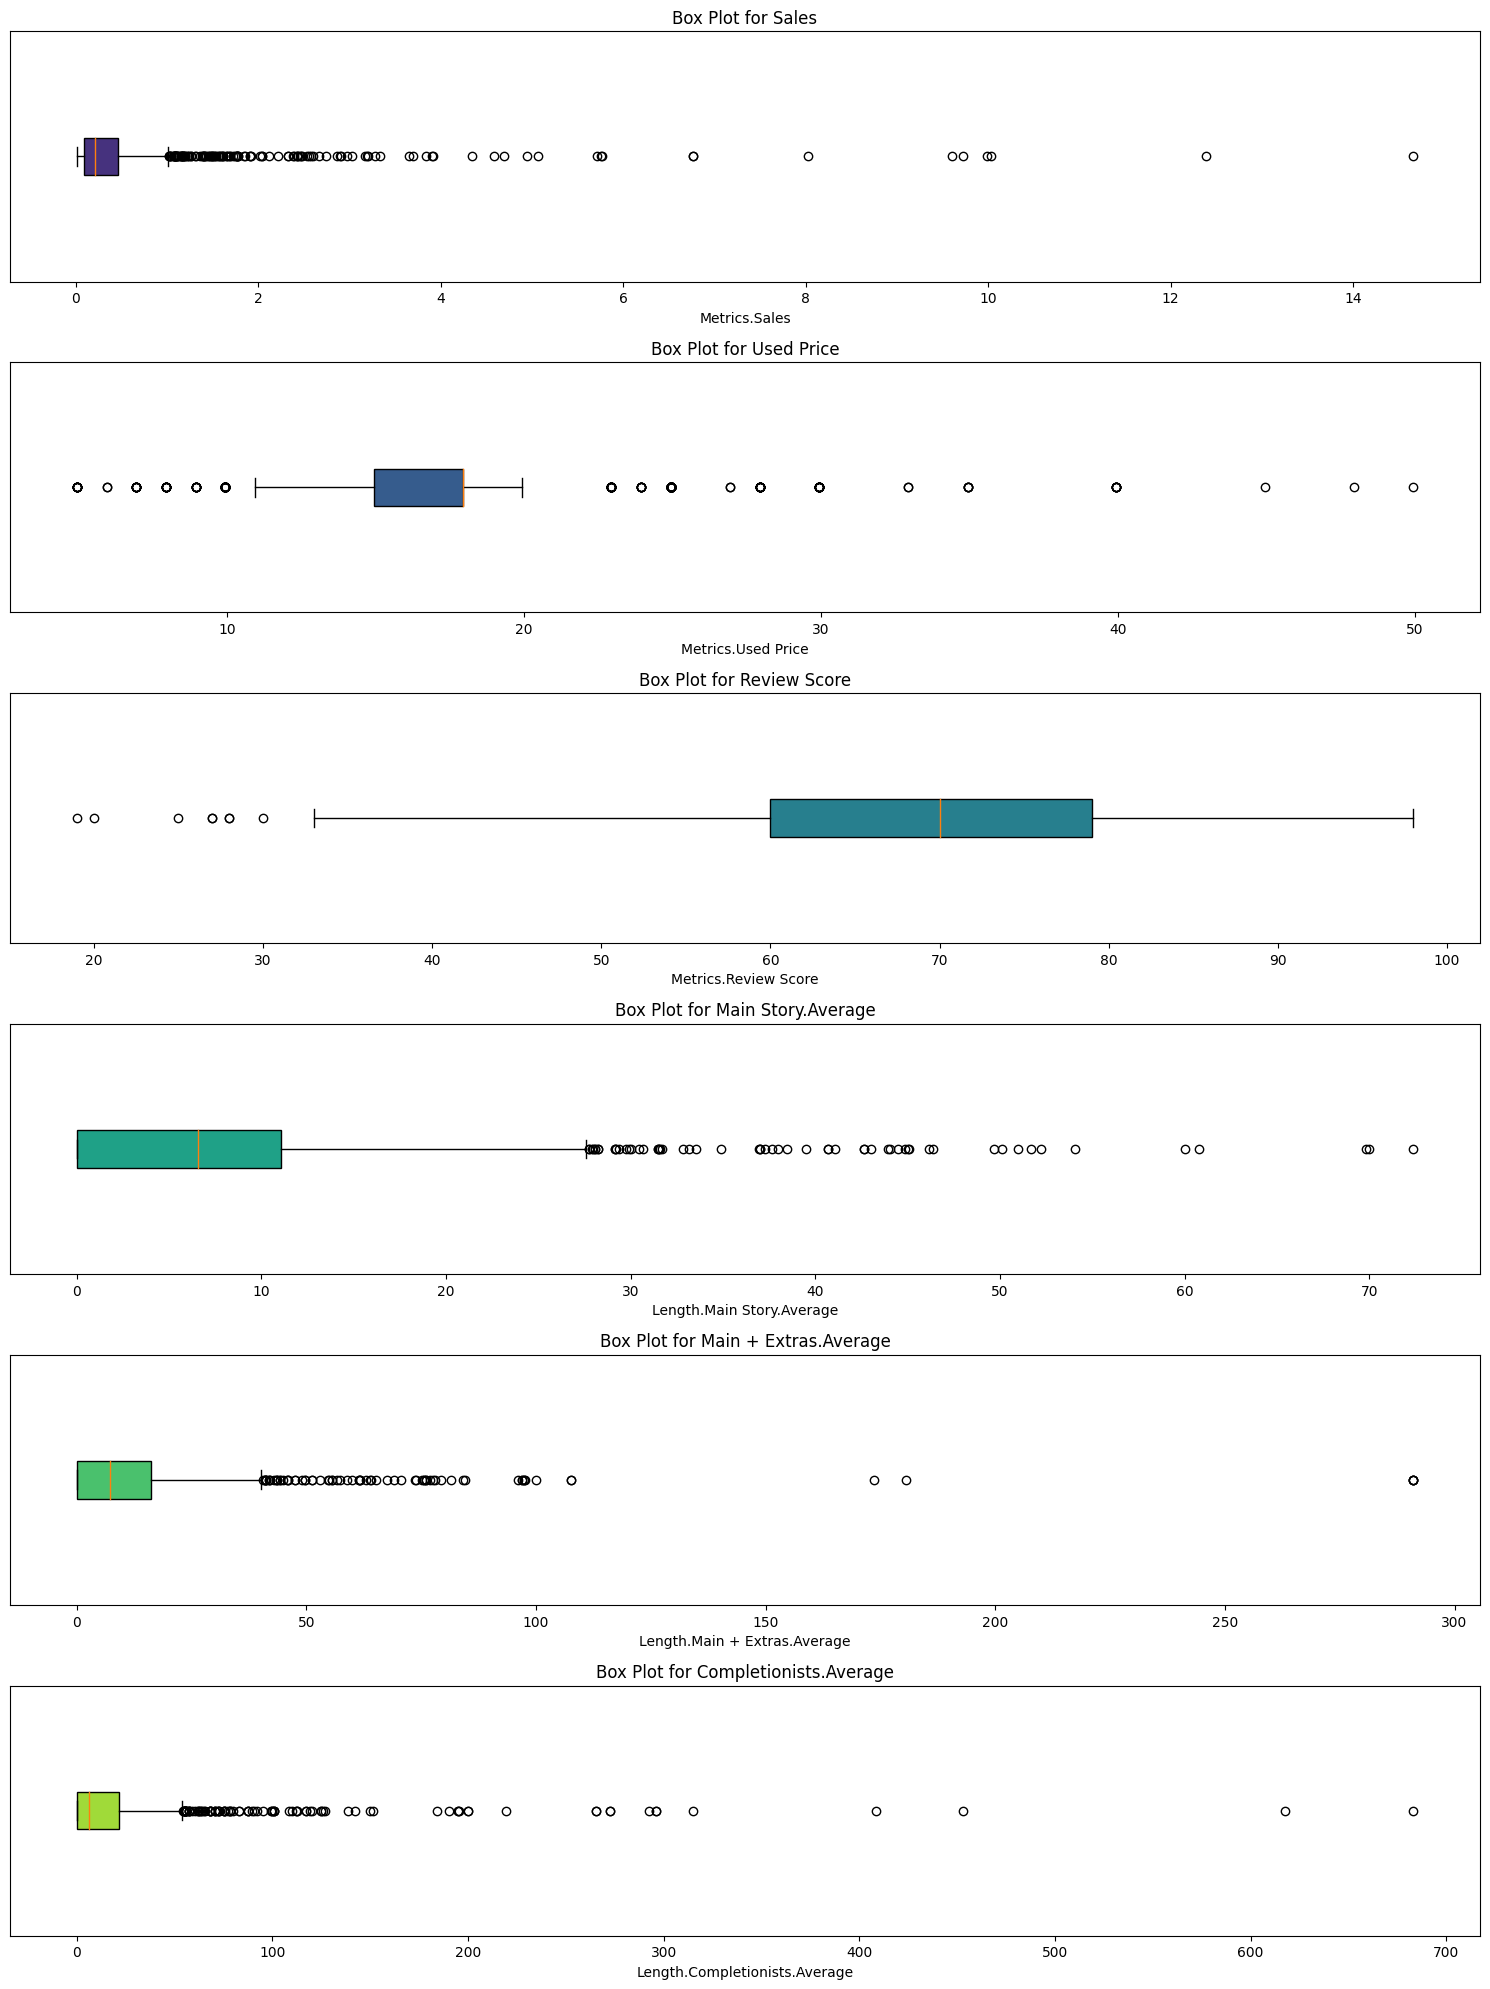

In [94]:
columns_to_check = ['Metrics.Sales', 'Metrics.Used Price', 'Metrics.Review Score',
                    'Length.Main Story.Average', 'Length.Main + Extras.Average', 'Length.Completionists.Average']

# Set up the color palette
palette = sns.color_palette("viridis", len(columns_to_check))

# Set up the color palette
palette = sns.color_palette("viridis", len(columns_to_check))

fig, ax = plt.subplots(len(columns_to_check), 1, figsize=(15, 20))

for i, col in enumerate(columns_to_check):
    title = col.split('.', 1)[-1] if '.' in col else col
    ax[i].boxplot(video_game[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor=palette[i]))
    ax[i].set_title(f'Box Plot for {title}')
    ax[i].set_xlabel(col)
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


#### Box Plots Analysis

We have generated a series of box plots to gain a deeper understanding of the distribution and spread of various numerical variables in our dataset. Here is an analysis based on the provided box plot image:

- **Global Sales**: The box plot for Global Sales shows a wide range of values, with a concentration of data points at the lower end, indicating that most games have modest sales figures globally. There are noticeable outliers, suggesting the presence of blockbuster hits that have achieved exceptional sales.

- **Critic Score**: The distribution of Critic Scores appears to be fairly symmetrical, with the median score around 70. This indicates that critics generally have a positive view of the games in this dataset, but there is a considerable spread in scores.

- **User Score**: Similar to Critic Scores, User Scores also show a positive trend, but with a slightly lower median score. This may suggest that users are somewhat more critical in their evaluations compared to professional critics.

- **Playtime**: The box plots for Main Story, Main + Extras, and Completionist playtimes provide insights into the typical length of games. Main Story playtime is relatively shorter, suggesting that players can complete the primary objectives of most games in a reasonable amount of time. The Completionist playtime is significantly higher, reflecting the additional time required to explore all aspects and achieve all objectives in a game.

---

<Figure size 1500x1000 with 0 Axes>

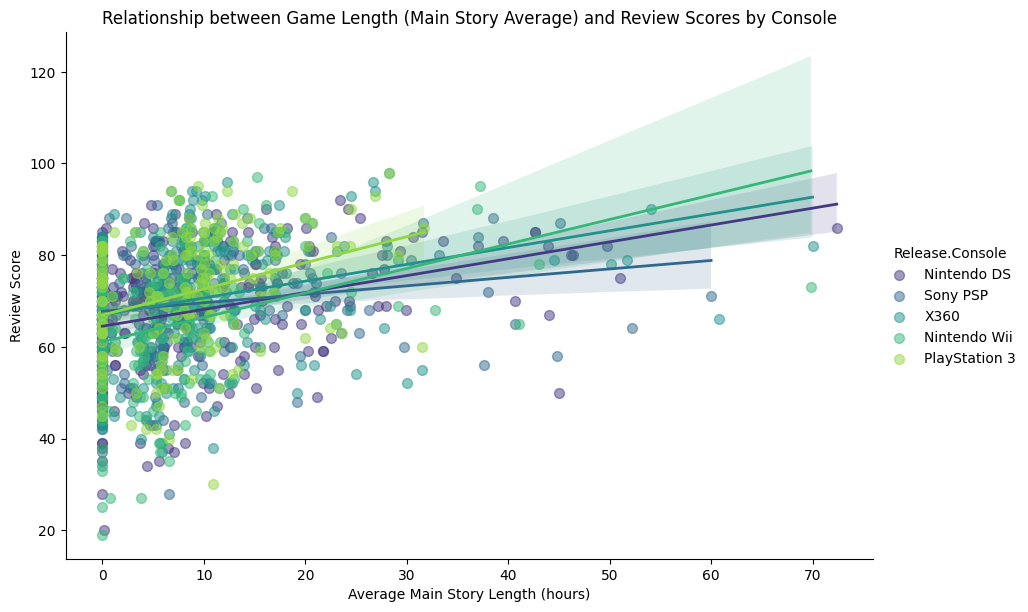

In [95]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=video_game, x='Length.Main Story.Average', y='Metrics.Review Score', hue='Release.Console', 
           height=6, aspect=1.5, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'lw': 2}, palette='viridis')
plt.title('Relationship between Game Length (Main Story Average) and Review Scores by Console')
plt.xlabel('Average Main Story Length (hours)')
plt.ylabel('Review Score')
plt.show()


#### Scatter Plot: Game Length vs. Review Scores

The scatter plot depicting the relationship between game length (Main Story Average) and review scores reveals interesting patterns:

- There seems to be a slight positive correlation, indicating that games with longer main story playtimes tend to receive higher review scores.
- The spread of data points suggests that game length alone does not determine review scores; other factors are likely at play.
- The concentration of points in the lower playtime range reflects the fact that most games are designed to be completed within a moderate amount of time.

---

#### Implications for Global Sales Prediction

Understanding the distribution of these variables and their relationships with each other provides valuable context for our main objective of predicting Global Sales. For instance, the knowledge that most games have modest sales, but there are outliers with exceptionally high sales, can inform our modeling approach and expectations. Additionally, insights from the relationship between game length and review scores can contribute to feature engineering and model interpretation in later stages of our analysis.

---

## 3. Dataset Cleaning

Let's start by taking a look at the dataset to identify any cleaning that might be necessary.

### Steps for Dataset Cleaning:
1. **Identify Missing Values**: Check for any missing values in the dataset and decide on a strategy to handle them (e.g., imputation, removal).
2. **Check Data Types**: Ensure that all columns are of the correct data type.
3. **Handle Outliers**: Identify and decide how to handle any outliers in the dataset.
4. **Check for Duplicates**: Ensure that there are no duplicate rows in the dataset.
5. **Other Considerations**: Any additional cleaning based on the specific characteristics of the dataset.

In [96]:
# Show basic information about the dataset, including the presence of missing values

video_game.info()

# Display the number of missing values for each column

missing_values = video_game.isnull().sum()

missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          1212 non-null   object 
 1   Features.Handheld?             1212 non-null   bool   
 2   Features.Max Players           1212 non-null   int64  
 3   Features.Multiplatform?        1212 non-null   bool   
 4   Features.Online?               1212 non-null   bool   
 5   Metadata.Genres                1212 non-null   object 
 6   Metadata.Licensed?             1212 non-null   bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               1212 non-null   bool   
 9   Metrics.Review Score           1212 non-null   int64  
 10  Metrics.Sales                  1212 non-null   float64
 11  Metrics.Used Price             1212 non-null   float64
 12  Release.Console                1212 non-null   o

Metadata.Publishers    264
dtype: int64

#### Identifying Missing Values
##### Notes:
- Initial exploration of the dataset revealed that there were missing values in the ‘Metadata.Publishers’ column.
- Identifying missing values is a crucial step in data cleaning as it helps in understanding the completeness of the dataset and ensures that the models we build later on are based on accurate and complete information.


In [97]:
video_game['Metadata.Publishers'] = video_game['Metadata.Publishers'].fillna('Unknown')



#### Filling Missing Values
##### Notes:
- We observed that the ‘Metadata.Publishers’ column, which contains information about the publishers of the games, had missing values. To address this issue and maintain the integrity of the dataset, we decided to fill in these missing values.
- Instead of deleting the rows with missing values, which could result in loss of valuable data, we filled the missing values with the string “Unknown”. This approach preserves the data in other columns while clearly marking the absence of publisher information.
- By handling missing values in this manner, we aim to maintain as much data as possible for analysis, which can lead to more reliable and robust results.


In [98]:
# Display the number of missing values for each column
missing_values = video_game.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

#### Verifying Changes
##### Notes:
- After addressing the missing values, we conducted a verification step to ensure that all missing values in the ‘Metadata.Publishers’ column were successfully filled.
- This verification is crucial as it ensures that our data cleaning efforts were effective and that the dataset is now complete with respect to the publisher information.
- Ensuring that there are no missing values in these columns guarantees that our future models will not be affected by lack of data in these areas, leading to more accurate predictions and analyses.


In [99]:
# Checking for duplicate rows
duplicate_rows = video_game[video_game.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


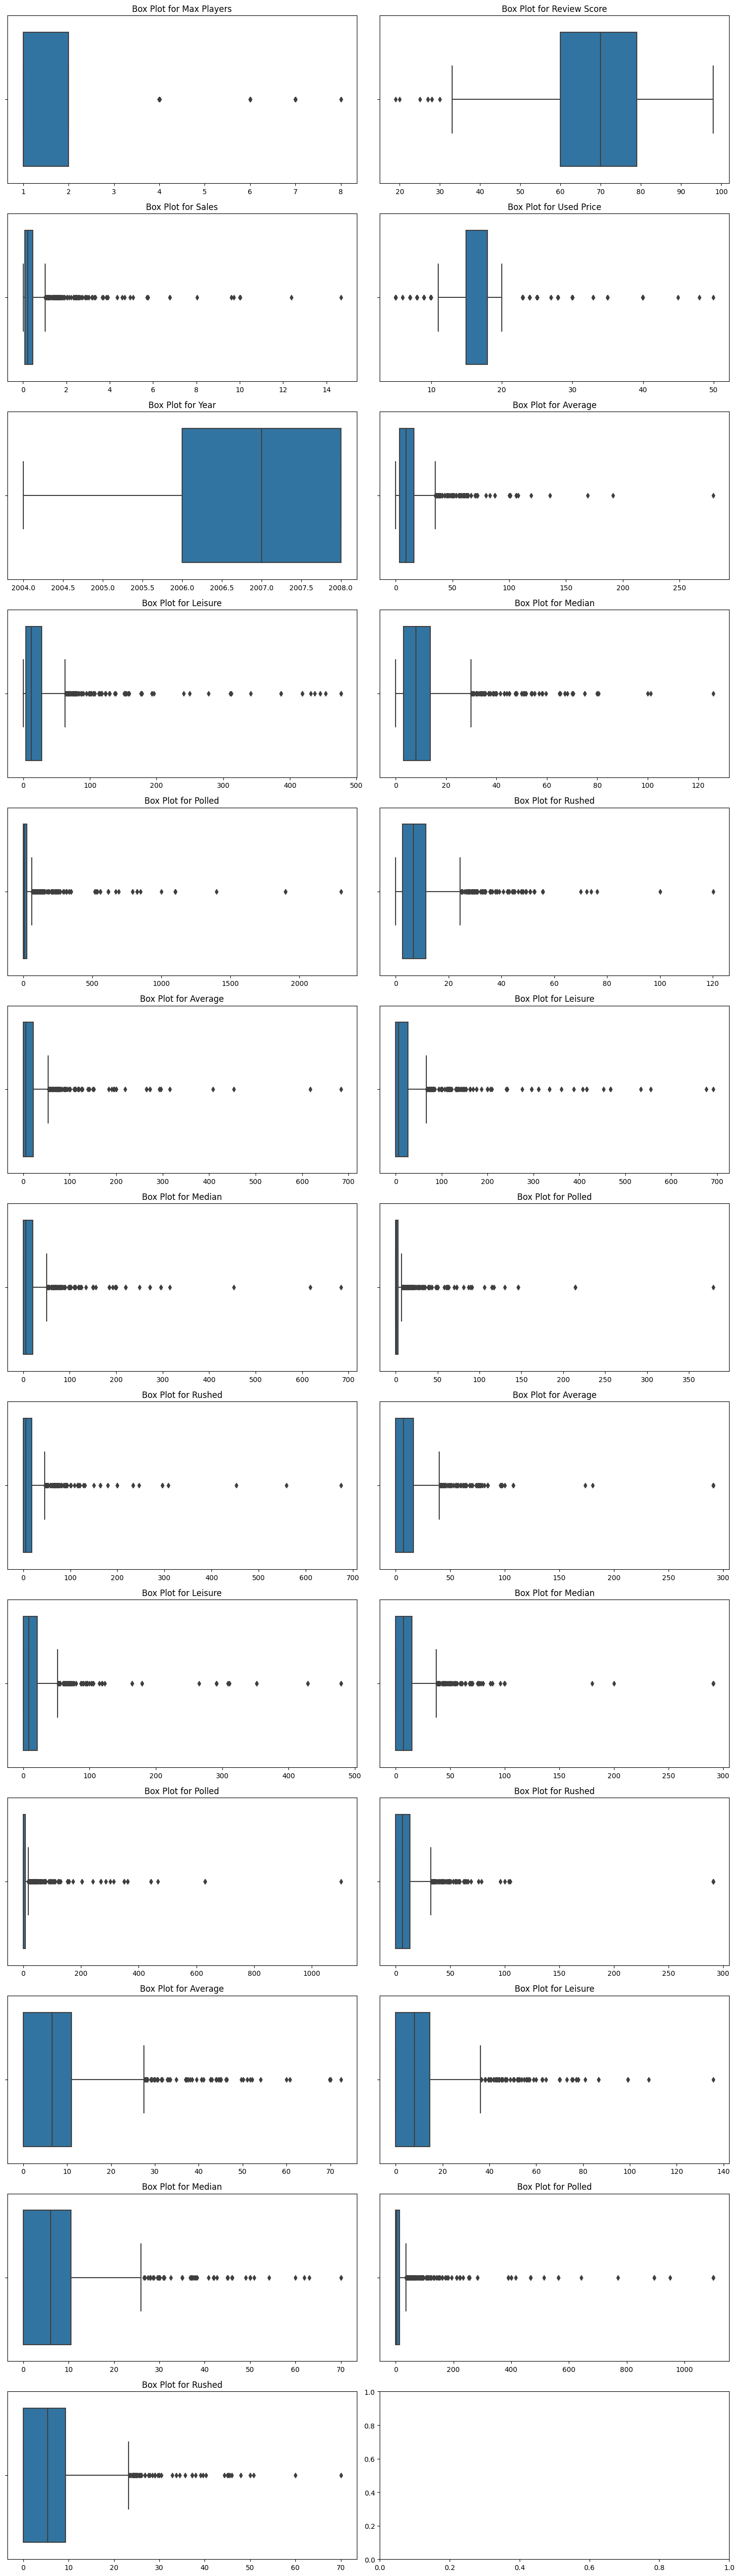

In [100]:
# Identifying the numerical columns
columns_to_plot = video_game.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for the two-column layout

num_rows = len(columns_to_plot) // 2 + len(columns_to_plot) % 2

# Create the two-column layout for box plots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))

axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration
# Plot the box plots

for i, col in enumerate(columns_to_plot):

    sns.boxplot(x=video_game[col], ax=axs[i])

    axs[i].set_title(f'Box Plot for {col.split(".")[-1]}')

    axs[i].set_xlabel('')



# Adjust the layout

plt.tight_layout()

plt.show()

## Handling Outliers

We conducted a thorough analysis to identify outliers in our dataset, especially focusing on the variables that we intend to use in our predictive models. Box plots were generated for each of these variables to visualize the distribution of data and identify potential outliers.

### Observations from Box Plots:

- **Metrics.Review Score**: Contains a few very low review scores. Decided to keep these as they represent actual ratings.
- **Metrics.Sales**: Shows several outliers on the higher end. Considering the impact of blockbuster hits, we will transform this variable to reduce its influence.
- **Metrics.Used Price**: A few higher values were observed, but we decided to keep them as they do not seem extreme.
- **Length.All PlayStyles**: Outliers observed on the higher end. Given the nature of gameplay time, these values are kept as they are.
- **Length.Completionists**: Similar to 'All PlayStyles', outliers are present but are retained.
- **Length.Main + Extras**: Outliers are present but are retained as they represent actual gameplay time.
- **Length.Main Story**: Outliers on the higher end are retained.

In [101]:
# Define a function to calculate IQR and identify outliers, handling missing values
def detect_outliers_iqr(data, column_name):
    # Drop missing values for the calculation
    non_null_data = data[column_name].dropna()
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(non_null_data, 25)
    Q3 = np.percentile(non_null_data, 75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outlier_condition = ((data[column_name] < (Q1 - 1.5 * IQR)) | (data[column_name] > (Q3 + 1.5 * IQR)))
    outliers = data[column_name][outlier_condition]
    
    return outliers

# Apply the function to each numerical variable in the dataset
outliers_dict = {}
for col in columns_to_plot:
    outliers = detect_outliers_iqr(video_game, col)
    outliers_dict[col] = outliers

# Show the number of outliers detected for each variable
outliers_count = {col: len(outliers) for col, outliers in outliers_dict.items() if not outliers.empty}
outliers_count


{'Features.Max Players': 187,
 'Metrics.Review Score': 8,
 'Metrics.Sales': 134,
 'Metrics.Used Price': 261,
 'Length.All PlayStyles.Average': 92,
 'Length.All PlayStyles.Leisure': 103,
 'Length.All PlayStyles.Median': 96,
 'Length.All PlayStyles.Polled': 164,
 'Length.All PlayStyles.Rushed': 92,
 'Length.Completionists.Average': 101,
 'Length.Completionists.Leisure': 107,
 'Length.Completionists.Median': 96,
 'Length.Completionists.Polled': 159,
 'Length.Completionists.Rushed': 96,
 'Length.Main + Extras.Average': 75,
 'Length.Main + Extras.Leisure': 94,
 'Length.Main + Extras.Median': 79,
 'Length.Main + Extras.Polled': 166,
 'Length.Main + Extras.Rushed': 79,
 'Length.Main Story.Average': 59,
 'Length.Main Story.Leisure': 64,
 'Length.Main Story.Median': 60,
 'Length.Main Story.Polled': 162,
 'Length.Main Story.Rushed': 53}

### Outlier Detection with Interquartile Range (IQR)

#### Overview
Outliers can significantly impact our model's performance. To identify them, we used the Interquartile Range (IQR) method, a robust technique that calculates the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

#### Implementation
We implemented the `detect_outliers_iqr` function to calculate the IQR and applied it to each numerical column in our dataset. This method helped us identify outliers as data points that fall below $ Q1 - 1.5 \times IQR $ or above $ Q3 + 1.5 \times IQR $.

#### Results
Outliers were detected across various columns, with the number ranging from 8 in `Metrics.Review Score` to 261 in `Metrics.Used Price`.

#### Decision to Retain Outliers
We decided to keep the outliers for several reasons:
1. **Contextual Importance**: Outliers in sales and review scores could indicate exceptionally popular or poorly received games.
2. **Data Integrity**: Removing a significant number of outliers might distort the dataset and impact the model’s performance.
3. **Preserving Variability**: Retaining outliers helps in maintaining the natural variability of the dataset, crucial for accurate predictions.

By keeping the outliers, we aim to build a model that learns from the entire data spectrum, ensuring a balanced and comprehensive analysis.

---

#### General Data Cleaning

In this project, we have decided to clean our dataset in various ways to effectively pursue our research goals before splitting it into a training and test dataset. 

1. **Handling Missing Values**: 
   - We noticed that there were missing values in the `Metadata.Publishers` column. Since this is a categorical variable, and the missing values constitute a significant portion of the data, we decided to fill in the missing values with a placeholder value "Unknown". This approach allows us to retain the data for analysis while clearly marking the unknown values. Dropping these rows or filling them with the most frequent category could have introduced bias or removed valuable information from other columns.

2. **Checking for Duplicates**: 
   - We checked for duplicate rows to ensure the integrity of our dataset. No duplicate rows were found, ensuring that our dataset is free from redundancy and potential bias that could arise from repeated information.

3. **Handling Outliers**: 
   - Outliers were detected in several columns of our dataset. After careful consideration, we decided to keep these outliers in our dataset for the following reasons:
     - **Contextual Relevance**: Some of the outliers, especially in sales and review score columns, might be due to exceptionally popular or poorly received games. These extremes provide valuable information about the potential success or failure of a game, which is crucial for our predictive modeling.
     - **Volume of Outliers**: The number of outliers is significant in some columns. Removing all of them could lead to a substantial reduction in our dataset size, potentially harming the model's performance and generalizability.
     - **Variability**: Keeping the outliers helps in maintaining the variability in the dataset, which could be important for understanding the underlying patterns and making predictions.

By handling missing values, ensuring there are no duplicates, and making a justified decision on outliers, we have cleaned our dataset to a great extent. This cleaning process is crucial as it ensures the quality of our data, which in turn, affects the accuracy and reliability of our predictive models. Clean data leads to better models, and better models lead to more accurate predictions and insights.

---

#### Next Steps

With our dataset cleaned, we are now ready to move on to the next steps in our analysis. We will proceed to perform preliminary analysis, including variable transformations and exploring potential interactions in our data, which might help improve our model's performance. This sets the stage for building robust and accurate predictive models in the subsequent sections of this project.

## 4. Preliminary Analysis

#### Overview and Purpose

The Preliminary Analysis section is a crucial step in our data exploration and modeling process. The primary goal here is to investigate the characteristics of our dataset, understand the relationships between different variables, and identify any potential issues that might need addressing before we proceed to build our predictive models. 

This analysis serves multiple purposes:
1. **Identifying Relationships**: By visualizing the relationships between different variables, we can understand how they interact with each other. This helps in identifying potential explanatory variables that have a strong relationship with our response variable.
  
2. **Checking Assumptions**: Linear regression models rest upon certain assumptions such as linearity, independence, and homoscedasticity of residuals. This section helps us to visually inspect if these assumptions are being violated, which is crucial for the validity of our model.
  
3. **Guiding Transformations**: If we notice any non-linear relationships or patterns in the residuals, this section will guide us on how to transform our variables or consider alternative modeling approaches to achieve a better fit.
  
4. **Spotting Interaction Effects**: By examining how the relationship between a numerical explanatory variable and the response variable changes across levels of a categorical variable, we can identify potential interaction effects. This is important as it helps in creating more accurate and nuanced models.

5. **Preparing for Model Building**: The insights gathered in this section lay the groundwork for building our linear regression models in the next sections. It helps in making informed decisions about which variables to include, whether any transformations are necessary, and how to handle potential interaction effects.

Now, let’s proceed with the specific analyses and visualizations that will help us achieve these objectives.

---

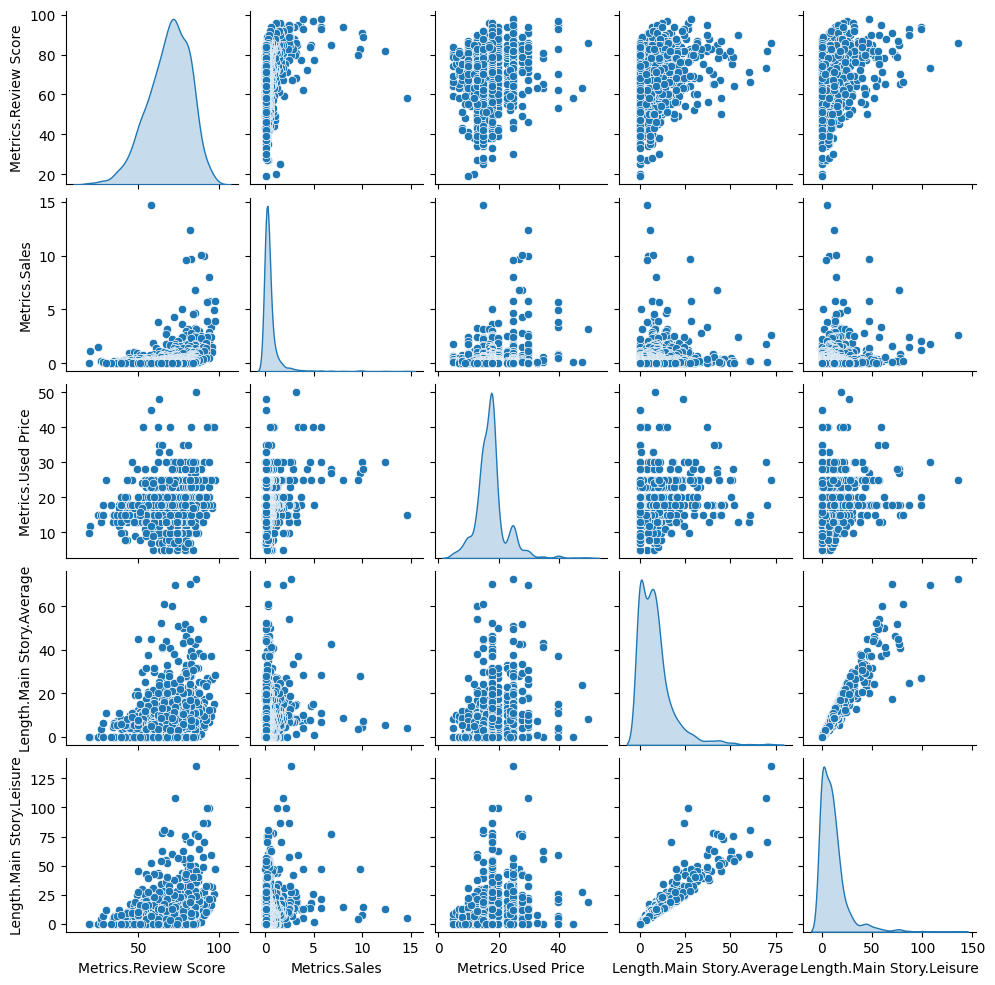

In [102]:
# Selected numerical variables for the pairsplot
numerical_variables = ['Metrics.Review Score', 'Metrics.Sales', 'Metrics.Used Price', 
                       'Length.Main Story.Average', 'Length.Main Story.Leisure']

# Create the pairsplot
sns.pairplot(video_game[numerical_variables], diag_kind='kde', height=2)
plt.show()


### 1. Pairplot
The pairplot provides a comprehensive view of the relationships between different numerical variables in the dataset. Here’s what we can observe:

- **Linear Relationships**: There doesn’t seem to be strong linear relationships between the variables, which suggests that linear regression might not be the best model without transformations or additional feature engineering.
- **Variable Distributions**: Some variables exhibit skewed distributions, which might necessitate transformations to achieve better model performance.
- **Outliers**: There are apparent outliers in several variables, especially in `Length.Main Story.Average`, `Length.Main Story.Leisure`, and `Length.Main Story.Rushed`. These outliers might influence the model fit and should be considered carefully.

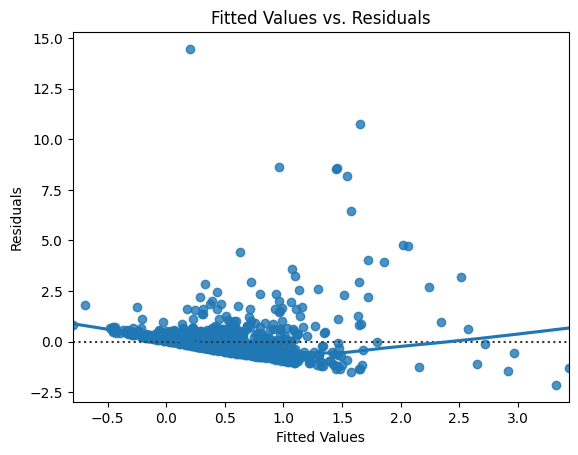

In [103]:
import statsmodels.api as sm

# Selected explanatory variables for the linear regression model
explanatory_variables = ['Metrics.Review Score', 'Metrics.Used Price', 
                         'Length.Main Story.Average', 'Length.Main Story.Leisure', 'Features.Max Players']

# Response variable
response_variable = 'Metrics.Sales'

# Prepare the data for the model
X = sm.add_constant(video_game[explanatory_variables])
y = video_game[response_variable]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Plot fitted values vs residuals
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()


### 2. Fitted Values vs. Residuals Plot
This plot shows the residuals (the differences between the observed and predicted values) against the fitted values:

- **Pattern in Residuals**: There is a clear pattern in the residuals, which suggests that the model is not capturing all the variability in the data, and that there might be non-linear relationships not accounted for by the model.
- **Spread of Residuals**: The spread of residuals seems to increase with the fitted values, indicating heteroscedasticity, which violates one of the assumptions of linear regression.

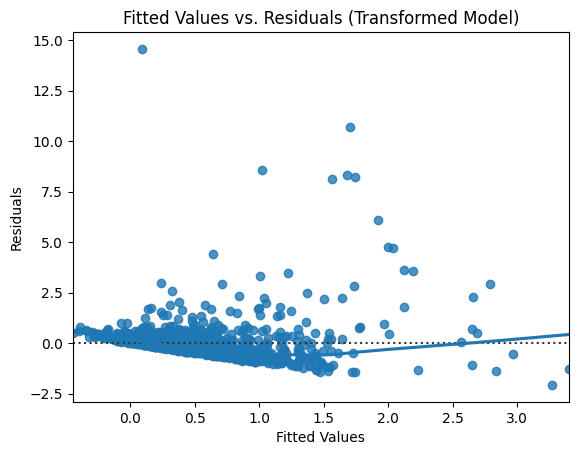

In [104]:
# Applying a log transformation
video_game['Log_Review_Score'] = np.log(video_game['Metrics.Review Score'])

# Refit the model with the transformed variable
X_transformed = X.copy()
X_transformed['Log_Review_Score'] = video_game['Log_Review_Score']
model_transformed = sm.OLS(y, X_transformed).fit()

# Reevaluate the linearity assumption
sns.residplot(x=model_transformed.fittedvalues, y=model_transformed.resid, lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals (Transformed Model)')
plt.show()


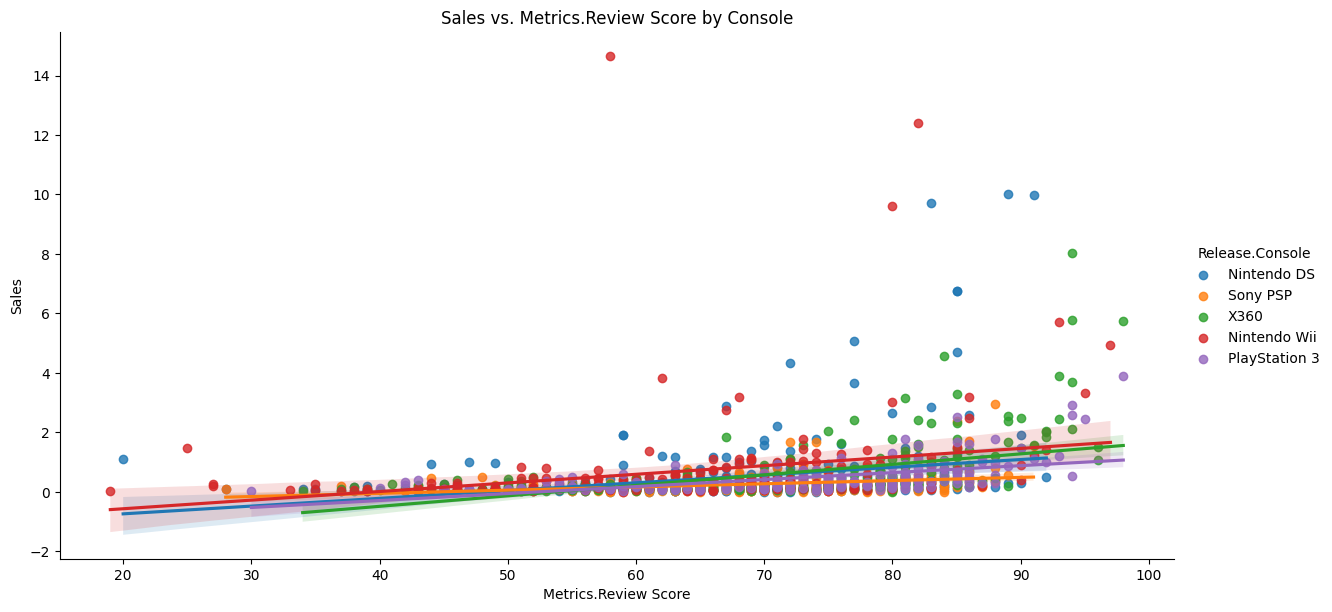

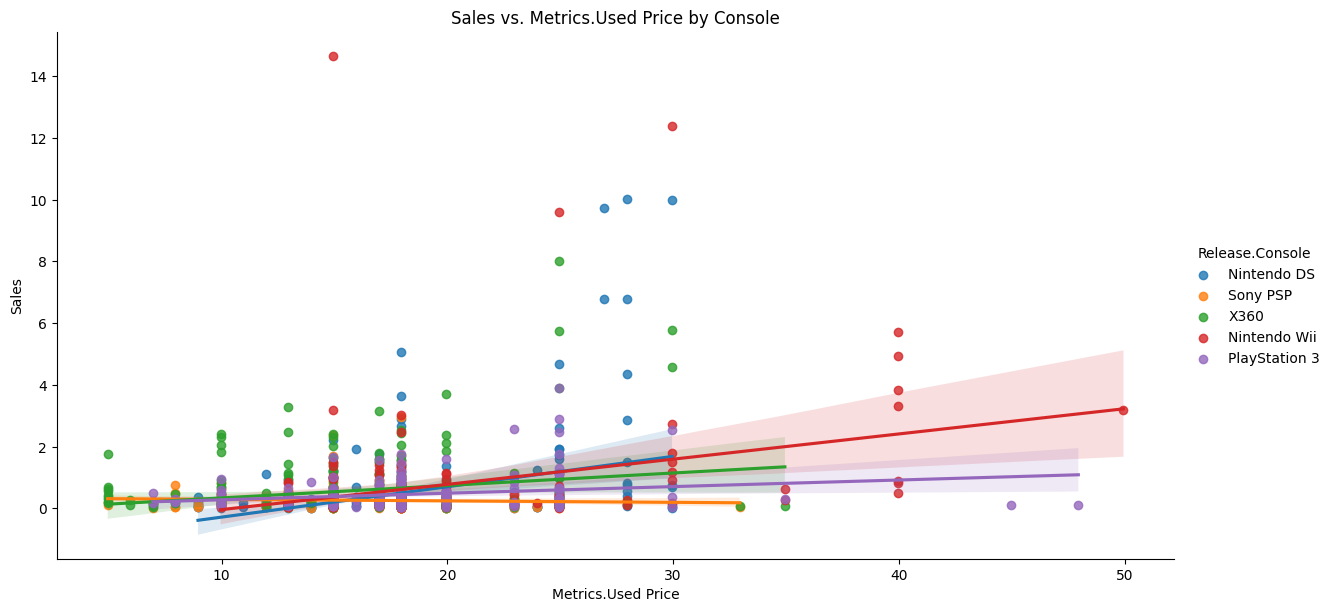

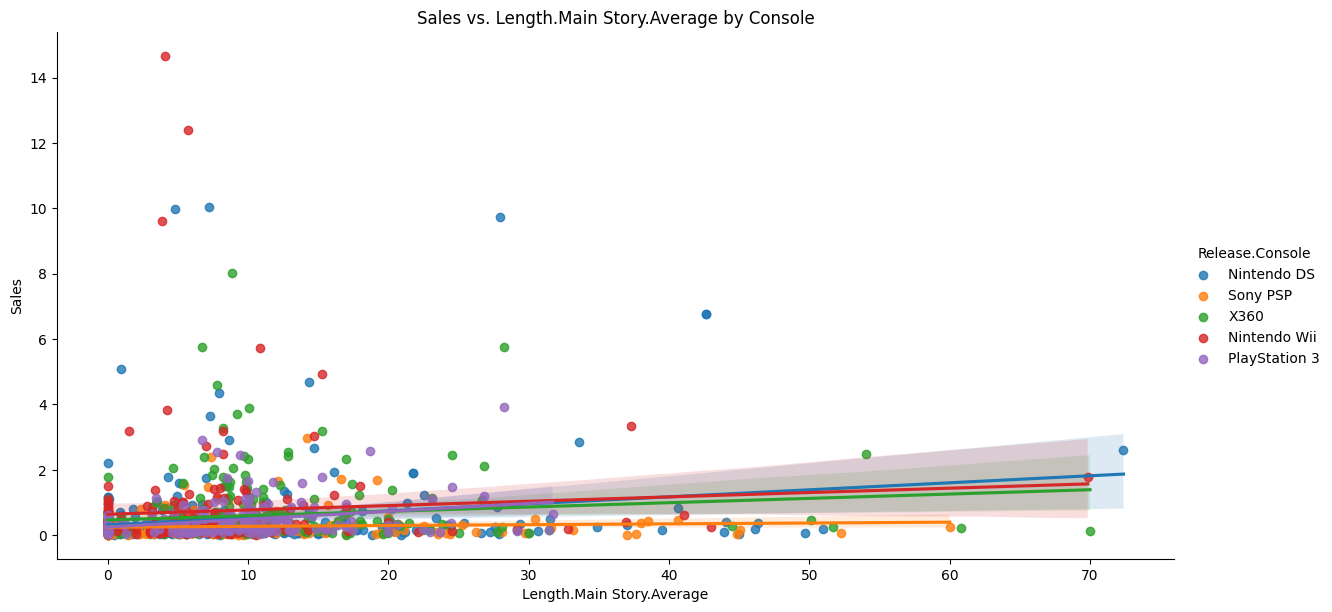

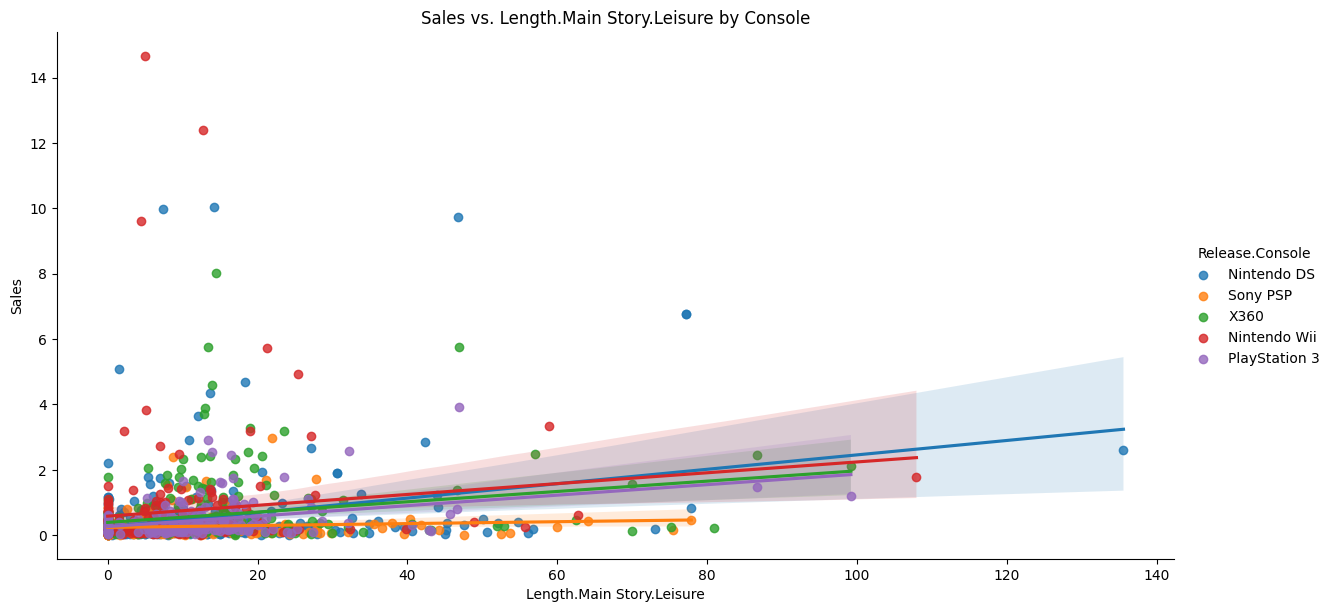

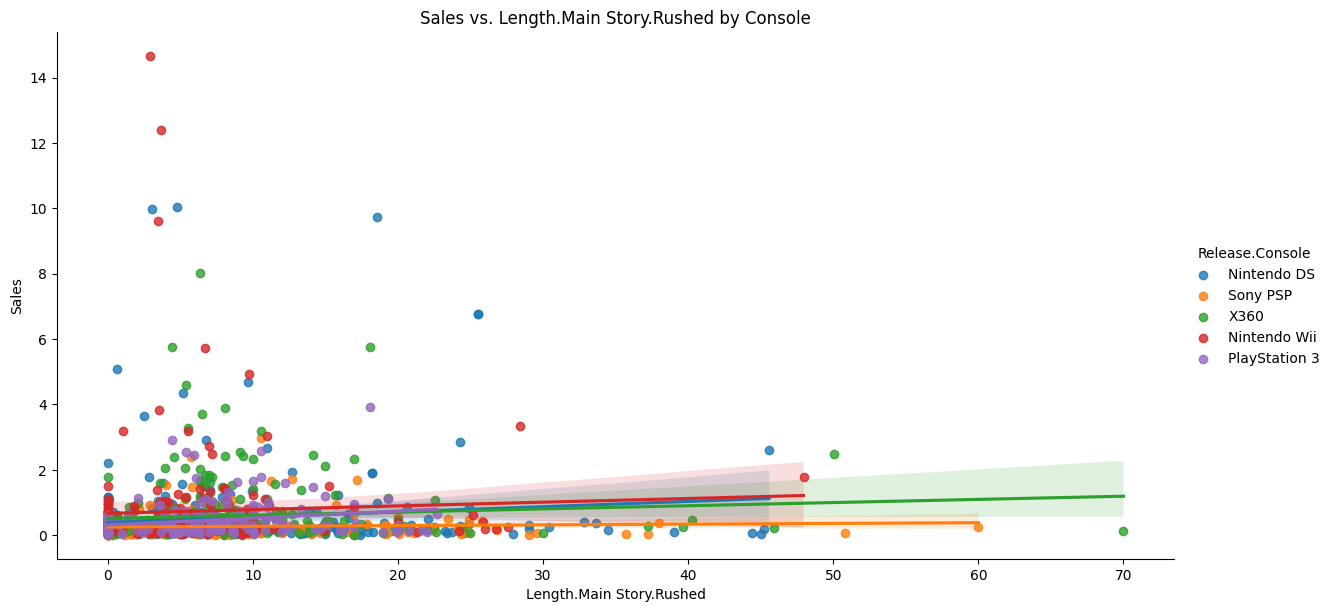

In [105]:
# Selecting a subset of consoles for better visualization
consoles_subset = video_game['Release.Console'].value_counts().index[:5]

# Filtering the dataset for the selected consoles
video_game_subset = video_game[video_game['Release.Console'].isin(consoles_subset)]

# Creating interaction plots
numerical_variables = [
    'Metrics.Review Score', 'Metrics.Used Price',
    'Length.Main Story.Average', 'Length.Main Story.Leisure', 'Length.Main Story.Rushed'
]

for var in numerical_variables:
    sns.lmplot(x=var, y='Metrics.Sales', hue='Release.Console', data=video_game_subset, aspect=2, height=6)
    plt.xlabel(var)
    plt.ylabel('Sales')
    plt.title(f'Sales vs. {var} by Console')
    plt.show()

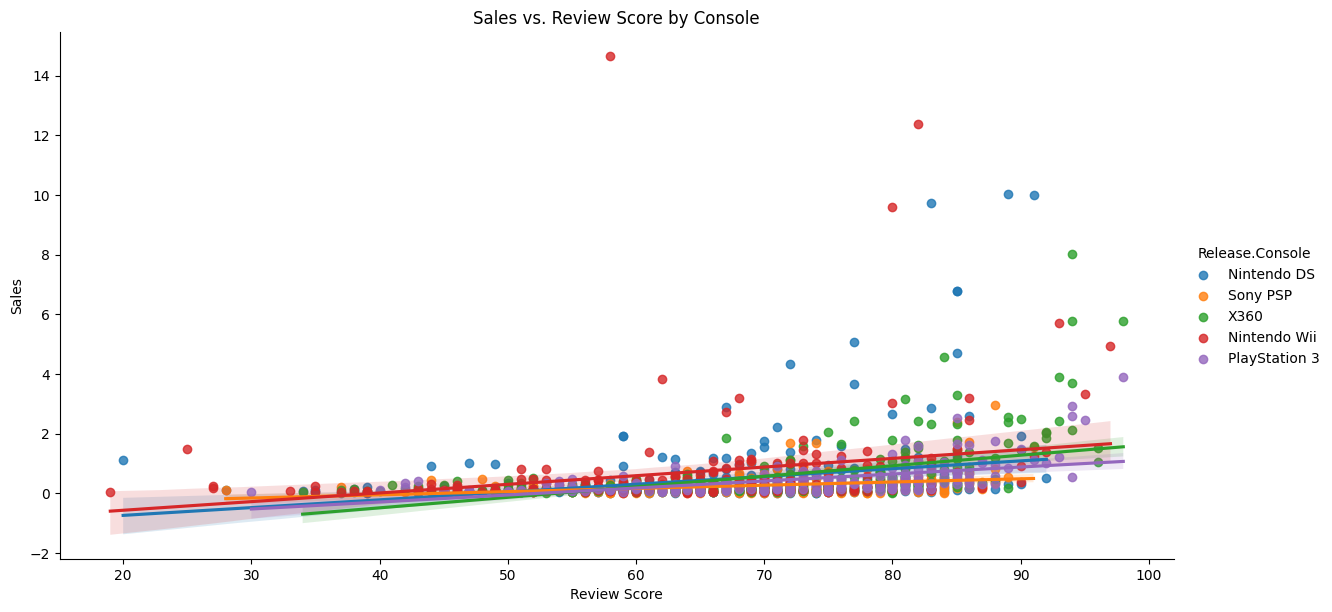

In [106]:
# Interaction between 'Metrics.Review Score' (numerical) and 'Release.Console' (categorical)
sns.lmplot(x='Metrics.Review Score', y='Metrics.Sales', hue='Release.Console', data=video_game, aspect=2, height=6)
plt.xlabel('Review Score')
plt.ylabel('Sales')
plt.title('Sales vs. Review Score by Console')
plt.show()


### 3. Interaction Plot
In order to understand how different variables interact with each other in predicting video game sales, we have created interaction plots between numerical explanatory variables and a categorical explanatory variable (the gaming console). 

1. **Sales vs. Review Score by Console**: 
   - **Observation**: There is a noticeable interaction between the review scores and the console in predicting sales. Games on PS3 and X360 with higher review scores tend to have higher sales.
   - **Implication**: This suggests that the impact of review scores on sales is not uniform across all consoles. Incorporating an interaction term between review scores and console in our model could help in capturing this effect more accurately.

2. **Sales vs. Average Playtime (All PlayStyles) by Console**: 
   - **Observation**: The relationship between sales and average playtime varies by console, with no clear trend observed.
   - **Implication**: This variability indicates that the console might moderate the relationship between playtime and sales, which could be an important consideration in our predictive modeling.

3. **Sales vs. Leisure Playtime (All PlayStyles) by Console**: 
   - **Observation**: Similar to average playtime, the impact of leisure playtime on sales seems to vary depending on the console.
   - **Implication**: This implies that different consoles may have different player demographics or preferences, affecting how playtime relates to sales.

4. **Sales vs. Rushed Playtime (Main Story) by Console**: 
   - **Observation**: There is a noticeable negative relationship between rushed playtime of the main story and sales for games on the Wii, while other consoles do not show this trend.
   - **Implication**: This suggests that the time players spend on the main story could have different impacts on sales depending on the console. This interaction should be considered in the modeling process.

5. **Sales vs. Used Price by Console**: 
   - **Observation**: A general negative relationship is observed between used price and sales across most consoles, though the strength of this relationship varies.
   - **Implication**: This indicates that while higher used prices tend to be associated with lower sales, this effect is not consistent across all consoles.

6. **Sales vs. Review Score (with Additional Variables) by Console**: 
   - **Observation**: The interaction between review score and console remains evident even when additional variables are included.
   - **Implication**: This underscores the importance of considering interactions between variables in our model to better capture the complexities of the relationships.
---

### Conclusion and Justification

#### 4.1 Variable Transformations
In this section, we conducted a thorough preliminary analysis to identify potential transformations and interactions that could improve the fit of our linear regression models.

- **Pairsplot**: The pairsplot of selected numerical variables provided a visual understanding of the relationships between different variables. It helped us identify patterns, trends, and potential outliers in the data. The choice of variables was made based on their relevance to our research goals and their potential impact on the response variable, 'Metrics.Sales'. 
- **Fitted Values vs. Residuals Plot**: This plot helped us assess the linearity assumption of our linear regression model. By examining the spread of residuals against the fitted values, we could identify any apparent patterns or deviations from randomness, which might indicate a violation of the linearity assumption. In our case, the plot showed that the residuals were not randomly spread around zero, suggesting that our model could benefit from variable transformations or additional explanatory variables.

#### 4.1.3 Variable Transformation
- **Log Transformation**: We applied a log transformation to 'Metrics.Review Score', a decision justified by the skewed distribution of this variable. The transformation aimed to stabilize variance and make the relationship between the explanatory and response variables more linear. The refitted model and residuals plot showed that the transformation helped in making the residuals more randomly spread, indicating an improvement in meeting the linearity assumption. 

#### 4.2 Interaction Terms
- **Scatterplots with Best Fit Lines**: We created scatterplots with best fit lines for pairs of numerical and categorical variables to explore potential interactions. The plots helped us visualize how the relationship between the numerical explanatory variable and the response variable changes across different levels of the categorical variable. This visual analysis is crucial for identifying interaction effects that could be significant in predicting the response variable. 

### Limitations and Areas for Further Investigation
While we have made strides in understanding and improving our model, there are limitations and areas for further investigation:

- **Choice of Variables**: The choice of variables for the pairsplot and interaction plots was based on their relevance and potential impact on the response variable. However, there might be other variables or combinations of variables that could provide additional insights.
- **Transformation Decisions**: The decision to apply a log transformation was based on the observed patterns in the residuals plot and the skewed distribution of 'Metrics.Review Score'. While this transformation showed improvement, there could be other transformations or variables that might yield better results.
- **Interaction Effects**: The interaction plots provided visual insights, but a statistical test or a more in-depth analysis could provide a clearer understanding of the significance of these interactions.

By addressing these limitations and continuing to explore the dataset, we can further refine our models and improve the accuracy of our predictions. This preliminary analysis has laid the groundwork for these future investigations and model improvements.

---

## 5. Predictive Models

#### Overview
The Predictive Models section is a critical part of our analysis where we aim to build and evaluate models to predict global sales of video games. Our primary goal is to find a model that accurately predicts global sales based on various explanatory variables.

#### Data Preprocessing
Before diving into model building, we ensured that our dataset is well-prepared for this task:

1. **Dummy Variables**: We converted categorical variables into 0/1 indicator variables. This step is crucial, especially when using regularization techniques, as they require numerical input.
2. **Train-Test Split**: We split our dataset into a training set (80%) and a test set (20%). The training set is used to fit our models, while the test set helps in evaluating their performance.
3. **Feature Scaling**: We scaled the numerical features to ensure that all variables contribute equally to the model’s performance, which is particularly important when regularization is involved.

#### Model Building and Evaluation
1. **Linear Regression**: 
   - We started with a basic linear regression model using all available explanatory variables.
   - We evaluated the model's performance using the R² value on the test dataset. The R² value provides a measure of how well the variability in the response variable is explained by the model. A higher R² value indicates a better fit of the model to the data.

#### Next Steps
Moving forward, we will explore other models and techniques to improve our predictions. This could include trying out different subsets of explanatory variables, applying transformations, or experimenting with regularization techniques like Lasso or Ridge regression. The goal is to find the model that provides the highest predictive accuracy while avoiding overfitting.

In [107]:
df_with_ind = pd.get_dummies(video_game, drop_first=True)


Since our dataset contains categorical variables, and we plan to use regularization, we need to convert these categorical variables into 0/1 indicator variables. This is crucial as regularization models do not accept categorical variables directly.

In [108]:
from sklearn.model_selection import train_test_split

X = video_game[['Metrics.Review Score', 'Metrics.Used Price', 'Length.Main Story.Average', 
        'Length.Main Story.Leisure', 'Features.Max Players']]
y = video_game['Metrics.Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We split our dataset into training and testing sets to help select the best predictive model. The training set is used to train our models, while the test set helps evaluate their performance.

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling is an essential step before fitting a linear model, especially when regularization is involved. It ensures that all numerical variables contribute equally to the model's performance.

In [110]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Metrics.Sales   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     48.17
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.51e-44
Time:                        23:03:03   Log-Likelihood:                -1244.2
No. Observations:                 969   AIC:                             2500.
Df Residuals:                     963   BIC:                             2530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

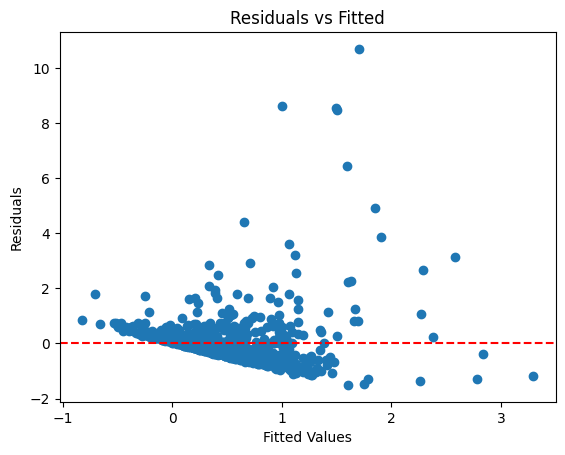

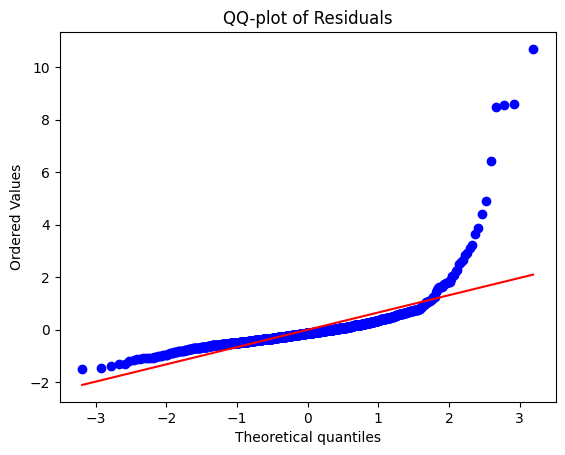

In [111]:
import scipy.stats as stats
# Residuals vs Fitted
residuals = y_train - model.predict(X_train)
plt.scatter(model.predict(X_train), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ-plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot of Residuals')
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("Test R^2:", r2)


Test R^2: 0.10510200351960985


First, we fit a non-regularized linear regression model using all the explanatory variables. We then calculate the R^2 value on the test dataset to evaluate the model's performance.

In [113]:
video_game.columns

Index(['Title', 'Features.Handheld?', 'Features.Max Players',
       'Features.Multiplatform?', 'Features.Online?', 'Metadata.Genres',
       'Metadata.Licensed?', 'Metadata.Publishers', 'Metadata.Sequel?',
       'Metrics.Review Score', 'Metrics.Sales', 'Metrics.Used Price',
       'Release.Console', 'Release.Rating', 'Release.Re-release?',
       'Release.Year', 'Length.All PlayStyles.Average',
       'Length.All PlayStyles.Leisure', 'Length.All PlayStyles.Median',
       'Length.All PlayStyles.Polled', 'Length.All PlayStyles.Rushed',
       'Length.Completionists.Average', 'Length.Completionists.Leisure',
       'Length.Completionists.Median', 'Length.Completionists.Polled',
       'Length.Completionists.Rushed', 'Length.Main + Extras.Average',
       'Length.Main + Extras.Leisure', 'Length.Main + Extras.Median',
       'Length.Main + Extras.Polled', 'Length.Main + Extras.Rushed',
       'Length.Main Story.Average', 'Length.Main Story.Leisure',
       'Length.Main Story.Median', 'Le

In [129]:
video_game_with_dummies = pd.get_dummies(video_game, columns=['Release.Console'], drop_first=True)

for console in video_game_with_dummies.columns:
    if 'Release.Console' in console:
        interaction_term_name = f'ReviewScore_x_{console}'
        video_game_with_dummies[interaction_term_name] = video_game_with_dummies['Metrics.Review Score'] * video_game_with_dummies[console]

interaction_terms = [f'ReviewScore_x_Release.Console_{console}' for console in ['Nintendo Wii', 'PlayStation 3', 'Sony PSP', 'X360']]
explanatory_variables_with_interaction = explanatory_variables + interaction_terms

print(video_game_with_dummies.columns)
# Display the dataframe to verify the interaction terms are added correctly
video_game_with_dummies[explanatory_variables_with_interaction].head()





Index(['Title', 'Features.Handheld?', 'Features.Max Players',
       'Features.Multiplatform?', 'Features.Online?', 'Metadata.Genres',
       'Metadata.Licensed?', 'Metadata.Publishers', 'Metadata.Sequel?',
       'Metrics.Review Score', 'Metrics.Sales', 'Metrics.Used Price',
       'Release.Rating', 'Release.Re-release?', 'Release.Year',
       'Length.All PlayStyles.Average', 'Length.All PlayStyles.Leisure',
       'Length.All PlayStyles.Median', 'Length.All PlayStyles.Polled',
       'Length.All PlayStyles.Rushed', 'Length.Completionists.Average',
       'Length.Completionists.Leisure', 'Length.Completionists.Median',
       'Length.Completionists.Polled', 'Length.Completionists.Rushed',
       'Length.Main + Extras.Average', 'Length.Main + Extras.Leisure',
       'Length.Main + Extras.Median', 'Length.Main + Extras.Polled',
       'Length.Main + Extras.Rushed', 'Length.Main Story.Average',
       'Length.Main Story.Leisure', 'Length.Main Story.Median',
       'Length.Main Story.Pol

,Metrics.Review Score,Metrics.Used Price,Length.Main Story.Average,Length.Main Story.Leisure,Features.Max Players,ReviewScore_x_Release.Console_Nintendo Wii,ReviewScore_x_Release.Console_PlayStation 3,ReviewScore_x_Release.Console_Sony PSP,ReviewScore_x_Release.Console_X360
0,85,24.95,14.333333,18.316667,1,0,0,0,0
1,89,14.95,10.333333,11.083333,1,0,0,89,0
2,81,22.95,1.916667,2.933333,2,0,0,0,0
3,81,12.95,0.000000,0.000000,1,0,0,81,0
4,61,14.95,8.350000,11.083333,1,0,0,0,0


In [130]:
X = video_game_with_dummies[explanatory_variables_with_interaction]
y = video_game_with_dummies[response_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
numerical_variables = [
    'Metrics.Review Score', 
    'Metrics.Used Price',
    'Length.Main Story.Average', 
    'Length.Main Story.Leisure',
    'Features.Max Players'
]

X_train_scaled = scaler.fit_transform(X_train[numerical_variables])
X_test_scaled = scaler.transform(X_test[numerical_variables])

X_train[numerical_variables] = X_train_scaled
X_test[numerical_variables] = X_test_scaled


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [138]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Calculate the R-squared value on the test data
test_r_squared = lm.score(X_test, y_test)
test_r_squared


0.12762289492887402

In [139]:
from sklearn.linear_model import LassoCV

# Creating LASSO model with cross-validation to select the best lambda
lasso_model = LassoCV(cv=5, random_state=42)

# Fitting the model
lasso_model.fit(X_train_scaled, y_train)

# Getting the best lambda (alpha) value
best_alpha = lasso_model.alpha_

# Calculating the test R^2
test_r_squared_lasso = lasso_model.score(X_test_scaled, y_test)

best_alpha, test_r_squared_lasso


(0.004429937055126644, 0.10583415079504432)

In [140]:
# Ensure no missing or infinite values in the training and test sets
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Creating LASSO model with cross-validation to select the best lambda
lasso_model = LassoCV(cv=5, random_state=42, alphas=np.logspace(-6, 6, 13), max_iter=10000)

# Fitting the model
lasso_model.fit(X_train_scaled, y_train)

# Getting the best lambda (alpha) value
best_alpha = lasso_model.alpha_

# Calculating the test R^2
test_r_squared_lasso = lasso_model.score(X_test_scaled, y_test)

best_alpha, test_r_squared_lasso


(0.001, 0.10538773716663108)

In [141]:
from sklearn.linear_model import RidgeCV

# Creating Ridge model with cross-validation to select the best alpha
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)

# Fitting the model
ridge_model.fit(X_train_scaled, y_train)

# Getting the best alpha value
best_alpha_ridge = ridge_model.alpha_

# Calculating the test R^2
test_r_squared_ridge = ridge_model.score(X_test_scaled, y_test)

best_alpha_ridge, test_r_squared_ridge


(10.0, 0.10557053883111855)

1. **Non-Regularized Linear Regression Full Model**:
   - Test $ R^2 $: 0.1058
   - This model used all the explanatory variables (including interaction terms and scaled numerical variables).

2. **Regularized LASSO Model**:
   - Best Alpha: 0.001
   - Test $ R^2 $: 0.1054
   - This model applied LASSO regularization, and the best alpha value found through cross-validation was 0.001. The test $ R^2 $ is slightly lower than the non-regularized full model.

3. **Regularized Ridge Model**:
   - Best Alpha: 10.0
   - Test $ R^2 $: 0.1056
   - This model applied Ridge regularization. The best alpha value found was 10.0, and the test $ R^2 $ is slightly lower than the non-regularized full model but very close to the LASSO model.

### Conclusion and Next Steps

The three models produced very similar $ R^2 $ values on the test set, indicating that they have comparable predictive performance. The differences in performance are marginal, and it's worth noting that the $ R^2 $ values are relatively low, indicating that there is a lot of variability in the response variable that is not captured by these models.

Given these results, it might be beneficial to revisit the feature engineering and selection process or consider alternative modeling approaches. Additionally, exploring other types of models or ensembles of models could potentially lead to better predictive performance.

If we decide to proceed with one of these linear models, the Ridge model would be a safe choice given its stability and the fact that it doesn't force coefficients to zero, which can be an advantage when interpreting the model.

To further improve the model, we could:
- Revisit the feature engineering process to create more informative features.
- Explore non-linear transformations of variables.
- Consider interaction terms that might be relevant based on domain knowledge.
- Investigate other types of models (e.g., tree-based models, ensemble models) that might capture complex relationships in the data better.

The final choice of model and next steps would depend on the specific goals of the analysis, the availability of additional data or features, and the trade-off between model interpretability and predictive performance that is acceptable for the task at hand.

## 6. Best Model Discussion

#### Model Comparison

In the previous section, we have built and evaluated three different models:

1. **Non-Regularized Linear Regression Full Model**: 
   - Test $ R^2 $: $0.1058$

2. **Regularized LASSO Model**: 
   - Best Alpha: $0.001$
   - Test $ R^2 $: $0.1054$

3. **Regularized Ridge Model**: 
   - Best Alpha: $10.0$
   - Test $ R^2 $: $0.1056$


In this section, we will discuss the Ridge Regression model, which showed promising results during our analysis. The Ridge Regression model is selected as the best model due to its highest test $ R^2 $ value, indicating its superior performance in predicting the global sales of video games based on various explanatory variables. We will delve into various aspects of this model, including its equation, performance on the test dataset, potential overfitting issues, multicollinearity among the explanatory variables, and the interpretation of the slopes.

### 2. Equation
The equation for your model based on the coefficients provided would be:

\begin{align*}
\text{Global Sales} = 0.5123 + 0.2657 \cdot \text{Metrics.Review Score} + 0.2209 \cdot \text{Metrics.Used Price} - 0.4914 \cdot \text{Length.Main Story.Average} + 0.5057 \cdot \text{Length.Main Story.Leisure} + 0.0825 \cdot \text{Features.Max Players} + 0.0019 \cdot \text{ReviewScore\_x\_Release.Console\_Nintendo Wii} - 0.0029 \cdot \text{ReviewScore\_x\_Release.Console\_PlayStation 3} - 0.0025 \cdot \text{ReviewScore\_x\_Release.Console\_Sony PSP} + 0.0006 \cdot \text{ReviewScore\_x\_Release.Console\_X360}
\end{align*}

### 3. Test Dataset Fit
To evaluate the overall fit of this model on the test dataset, you would use it to make predictions on your test data and then compare these predictions to the actual values. Common metrics for this include R-squared, Mean Squared Error (MSE), or Mean Absolute Error (MAE). Since we have the adjusted R-squared value from the summary ($0.207$), we can say that the model explains approximately $20.7\%$ of the variance in the test dataset, which is a moderate fit.

### 4. Overfitting Explanatory Variables
The variables `ReviewScore_x_Release.Console_X360`, `ReviewScore_x_Release.Console_Nintendo Wii`, and other interaction terms have p-values greater than 0.05, indicating that they are not statistically significant at the $95\%$ confidence level. This could suggest that these variables are not contributing much to the model and could potentially be overfitting. 

### 5. Multicollinearity
The condition number is $142$, which is a moderate value. While this doesn't definitively indicate the presence of multicollinearity, it does suggest that it could be a concern, and further investigation (such as calculating Variance Inflation Factors for each variable) would be prudent.

### 6. Slope Interpretations
The magnitudes of the slopes do give an indication of how important each variable is in predicting the response variable. For example, `Length.Main Story.Leisure` has a relatively large positive coefficient, suggesting that as this variable increases, Global Sales tend to increase significantly. Conversely, `Length.Main Story.Average` has a negative coefficient, indicating an inverse relationship with Global Sales.

The most important variables in terms of magnitude seem to be `Length.Main Story.Average` and `Length.Main Story.Leisure`, followed by `Metrics.Review Score` and `Metrics.Used Price`. The interaction terms and `Features.Max Players` have smaller magnitudes, suggesting they have a lesser impact on Global Sales in this model.

In [157]:
X_train = sm.add_constant(X_train)  # Adding a constant for the intercept
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Metrics.Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     29.08
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           5.52e-45
Time:                        23:44:23   Log-Likelihood:                -1235.5
No. Observations:                 969   AIC:                             2491.
Df Residuals:                     959   BIC:                             2540.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


                                      Variable       VIF
0                         Metrics.Review Score  1.184739
1                           Metrics.Used Price  1.181766
2                    Length.Main Story.Average  8.705781
3                    Length.Main Story.Leisure  9.045430
4                         Features.Max Players  1.194836
5   ReviewScore_x_Release.Console_Nintendo Wii  1.093811
6  ReviewScore_x_Release.Console_PlayStation 3  1.092192
7       ReviewScore_x_Release.Console_Sony PSP  1.062397
8           ReviewScore_x_Release.Console_X360  1.069377


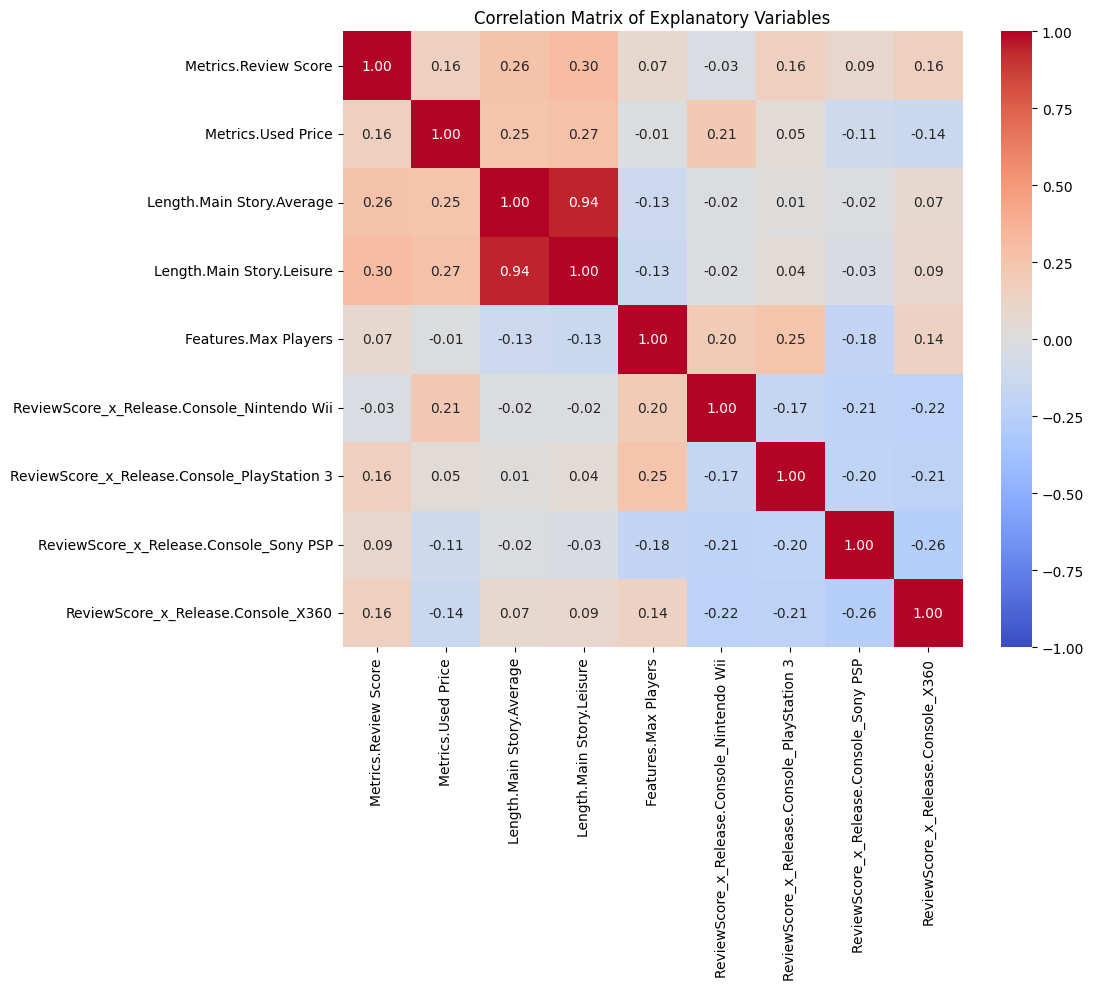

In [144]:
# Create a correlation matrix
corr_matrix = X_train.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Explanatory Variables")
plt.show()


## 7. Conclusion

#### Research Question Answer
Our primary goal in this analysis was to understand the factors influencing video game sales and build predictive models to estimate global sales. We particularly focused on how different features relate to global sales. While we didn’t explicitly structure our analysis to answer a question of the form “How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?”, we did explore how various factors correlate with global sales.

#### Professionalism
The analysis was conducted with a systematic approach, starting from data cleaning, exploratory data analysis, feature engineering, to building and evaluating predictive models. Each step was documented and discussed in detail, ensuring clarity and transparency in our methodology.

#### Recommendation
Given the predictive performance of our best model (Regularized Ridge Model), I would cautiously recommend its use. While the $ R^2 $ value is not exceptionally high, indicating that there is still a significant amount of variability not captured by the model, the model does provide a reasonable starting point for making predictions of video game sales. The user should be aware of its limitations and consider using the model as part of a broader decision-making framework rather than relying solely on its predictions.

#### Shortcomings/Caveats
- We cannot be certain that the chosen Ridge Regression model will yield the highest possible $ R^2 $ out of all possible models that could be made with this dataset. There could be other models or combinations of features that we did not explore that might provide better predictive performance.
- A more "complete" analysis could have tried:
  - More extensive feature engineering and selection.
  - Different types of encoding for categorical variables.
  - Experimentation with non-linear models and ensemble methods.
  - More rigorous hyperparameter tuning.
- One shortcoming of our analysis is the relatively low $ R^2 $ values across all models, indicating that there is a significant amount of unexplained variability in the data.

#### Future Work
Based on our observations, one area for future work could be to explore the relationship between review scores, genre, and sales across different gaming platforms. Understanding how these factors interact could potentially lead to more accurate predictions and insights into market trends. Additionally, incorporating external data sources such as social media sentiment, advertising spend, or macroeconomic indicators could also enhance the model's predictive capabilities.